Mounting the google drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Predicting Employee Attrition for Augmenting Institutional Yield

<h3>Objectives</h3>
<ol>
<li>To conduct an Exploratory Data Analysis and present the subsequent visualization via plots.</li>
<li>Uncover the factors that contribute to the attrition.</li>
<li>To implement classification algorithms for attrition prediction and present rationale supporting the output scores for each model.</li>
</ol>

<h3>Importing the libraries</h3>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from scipy import stats
from tabulate import tabulate
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, confusion_matrix, precision_recall_curve, roc_curve,roc_auc_score,precision_recall_curve, auc, f1_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.cluster import KMeans
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

import warnings
warnings.filterwarnings('ignore')

<h2> Data Set Description </h2>

In [ ]:
dataset = pd.read_csv("/content/drive/MyDrive/data/attrition_dataset.csv")
pd.options.display.max_columns = None
dataset.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


The <a href = "https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset">dataset</a> used is of IBM employee attrition dataset.<br><br>
The reason for the selection of this dataset is that it has no missing values (something that is expected from a professional institution keeping a record of employees) and it shows high class imbalance in the fact that 'Yes' in attrition is significantly lower than 'No'(which resembles a real world scenario). Thus any application of machine learning principles on it would output real life results.<br><br>
Dataset comprises of 1470 rows and 35 columns.<br>
Description of important dataset columns : 
<ol>
<li>Age: 18 to 60 years old</li>
<li>Attrition: Whether employees are still with the company or whether they’ve gone to work somewhere else.</li>
<li>BusinessTravel: Travel_Rarely, Travel_Frequently, Non-Travel</li>
<li>DistanceFromHome: Distance between the company and their home in miles.</li>
<li>MonthlyIncome: Employees' numeric monthly income.</li>
<li>EnvironmentSatisfaction : 1 'Low' 2 'Medium' 3 'High' 4 'Very High'</li>
<li>JobInvolvement : 1 'Low' 2 'Medium' 3 'High' 4 'Very High'</li>
<li>JobSatisfaction : 1 'Low' 2 'Medium' 3 'High' 4 'Very High'</li>
<li>MaritalStatus: Married, Single, Divorced.</li>
<li>Education: 1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'.</li>
<li>EducationField: Life Sciences， Medical， Marketing，Technical Degree，Other.</li>
<li>WorkLifeBalance : 1 'Bad' 2 'Good' 3 'Better' 4 'Best'</li>
<li>RelationshipSatisfaction : 1 'Low' 2 'Medium' 3 'High' 4 'Very High'</li>
<li>Stock Option : 'Yes' and 'No'</li>

</ol>


<h2>Checking Dataset for null values</h2>

In [ ]:
dataset.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

There are no null values in any column indicating that the dataset is complete and does not require any sort of treatment for missing values.

<h2>Describing the dataset</h2>

In [ ]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


<h2>Checking for outliers using boxplots</h2>

Text(0.5, 1.0, 'NumCompaniesWorked')

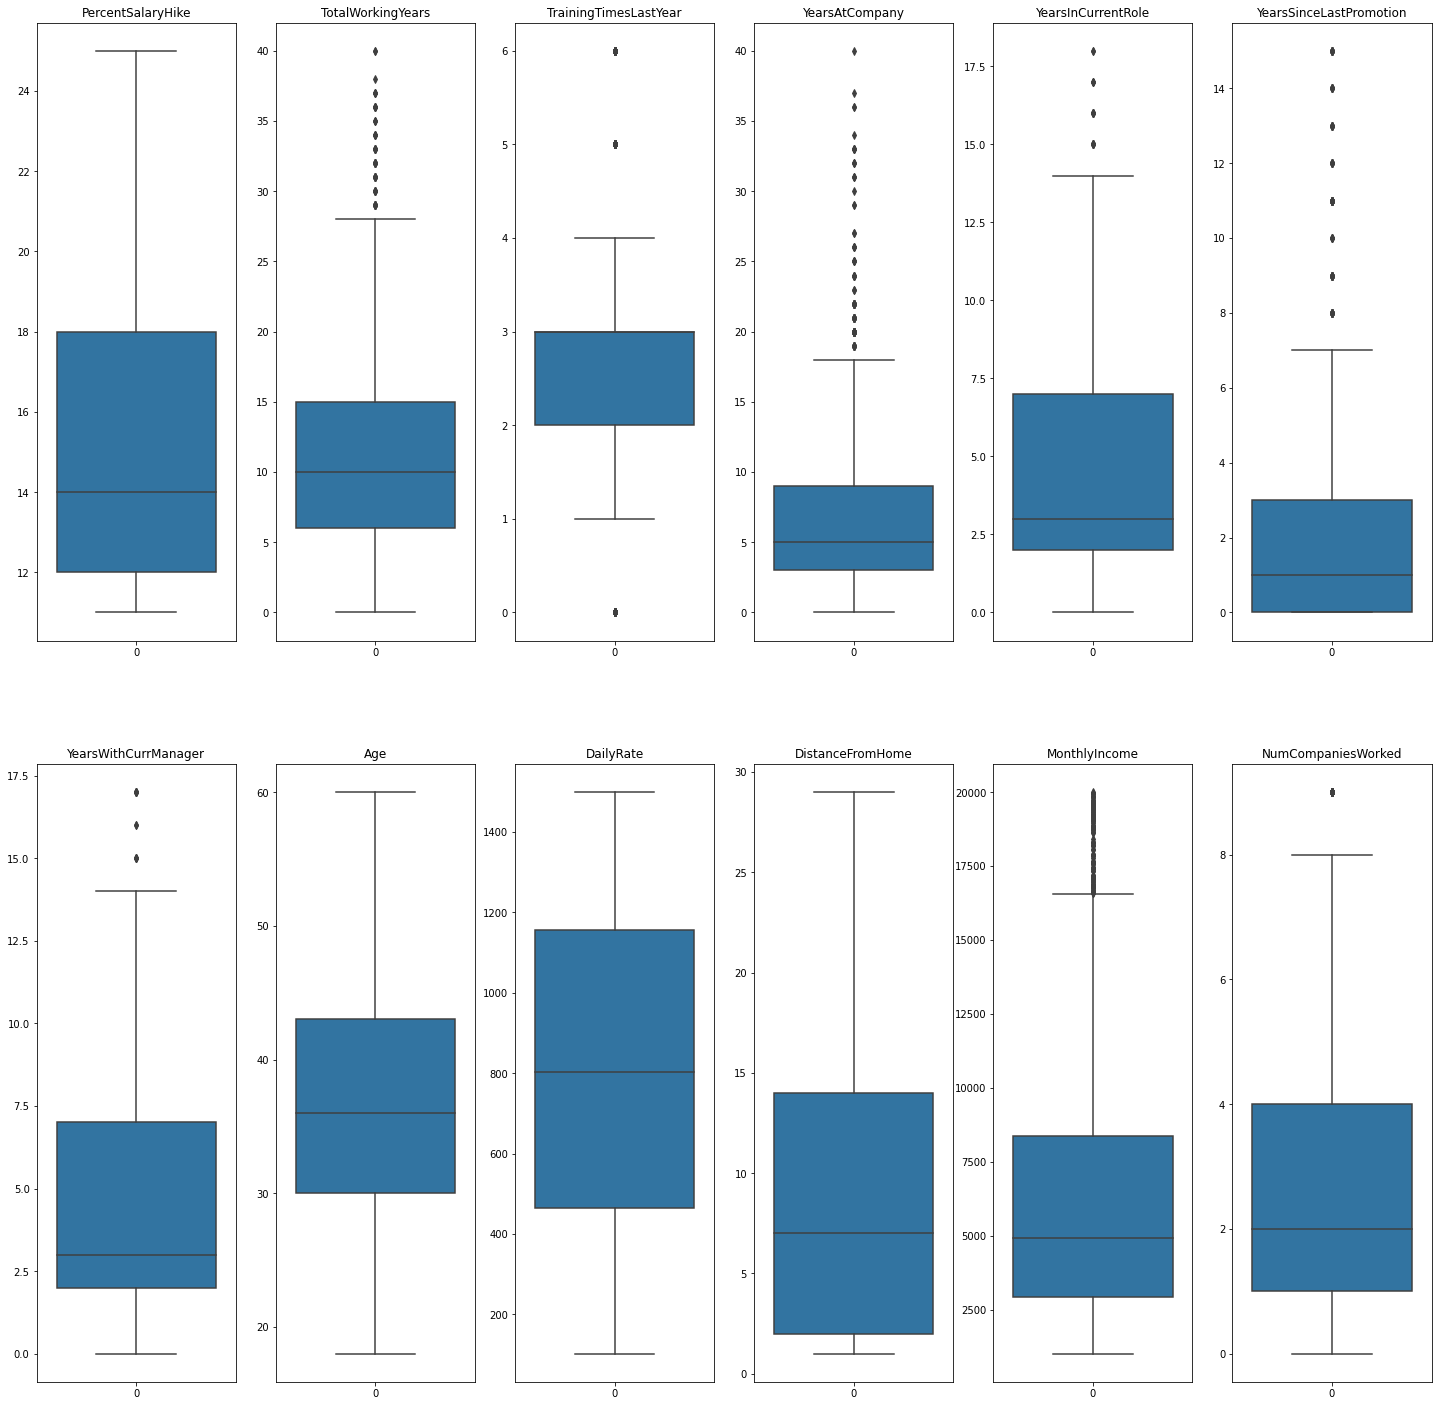

In [ ]:
f, ax = plt.subplots(2,6,figsize = (25,25))
sns.boxplot(data = dataset['PercentSalaryHike'],ax = ax[0][0]).set_title('PercentSalaryHike')
sns.boxplot(data = dataset['TotalWorkingYears'],ax = ax[0][1]).set_title('TotalWorkingYears')
sns.boxplot(data = dataset['TrainingTimesLastYear'], ax = ax[0][2]).set_title('TrainingTimesLastYear')
sns.boxplot(data = dataset['YearsAtCompany'],ax = ax[0][3]).set_title('YearsAtCompany')
sns.boxplot(data = dataset['YearsInCurrentRole'],ax = ax[0][4]).set_title('YearsInCurrentRole')
sns.boxplot(data = dataset['YearsSinceLastPromotion'],ax = ax[0][5]).set_title('YearsSinceLastPromotion')
sns.boxplot(data = dataset['YearsWithCurrManager'],ax = ax[1][0]).set_title('YearsWithCurrManager')
sns.boxplot(data = dataset['Age'],ax = ax[1][1]).set_title('Age')
sns.boxplot(data = dataset['DailyRate'],ax = ax[1][2]).set_title('DailyRate')
sns.boxplot(data = dataset['DistanceFromHome'],ax = ax[1][3]).set_title('DistanceFromHome')
sns.boxplot(data = dataset['MonthlyIncome'],ax = ax[1][4]).set_title('MonthlyIncome')
sns.boxplot(data = dataset['NumCompaniesWorked'],ax = ax[1][5]).set_title('NumCompaniesWorked')



1.   Age, DistanceFromHome, HourlyRate, MonthlyRate, DailyRate do not have outliers
2.   TrainingTimeLastYear, YearsWithCurrManager, NumCompanies worked have moderate amount of outliers.
3.   YearsAtCompany, TotalWorkingHours, MonthlyIncome have a large number of outliers.



<h2>Checking for feature independence with help of correlation matrix</h2>

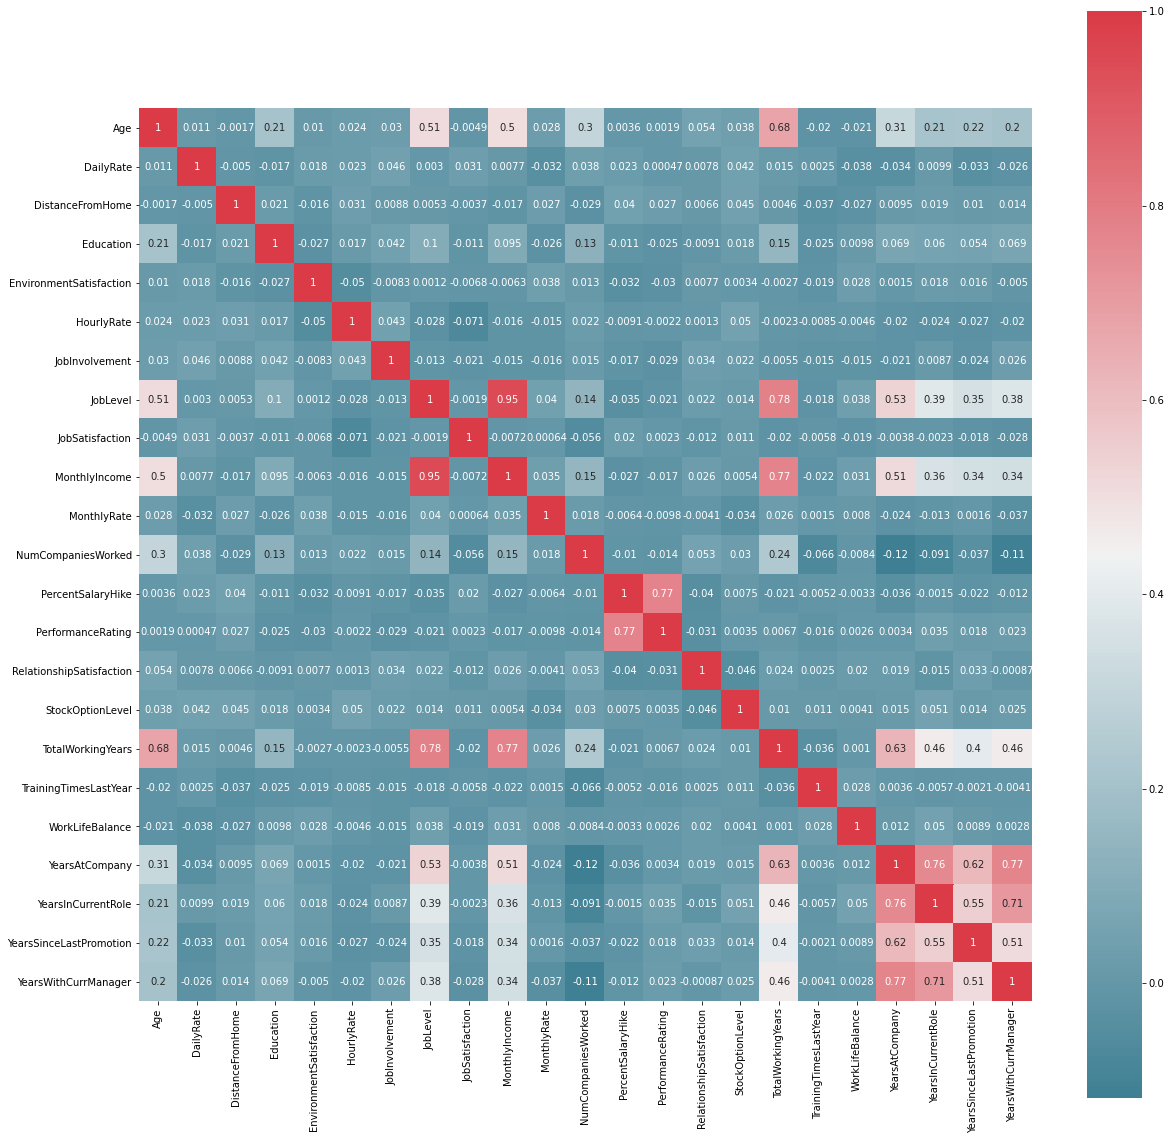

In [ ]:
# Dropping Redundant Columns
dataset.drop(['EmployeeNumber','EmployeeCount', 'Over18', 'StandardHours'] ,axis = 1,inplace=True)

# Plotting the correlation matrix
f, ax = plt.subplots(figsize=(20,20))
corr = dataset.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap = sns.diverging_palette(220,10,as_cmap=True),square = True,ax=ax,annot=True)



1.   JobLevel and MonthlyIncome have high correlation (0.95)
2.   YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrentManager have correlation among (0.72-0.77)



In [ ]:
# Converting the Attrition, Overtime and Gender columns into binary integers
dataset['Attrition'] = dataset['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0) 
dataset['OverTime'] = dataset['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0) 
dataset['Gender'] = dataset['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

# Combining EnvironmentSatisfaction, JobInvolvement, JobSatisfaction, RelationshipSatisfaction to form a new Feature HolisticSatisfaction
dataset['HolisticSatisfaction'] = dataset['EnvironmentSatisfaction'] + dataset['JobInvolvement'] + dataset['JobSatisfaction'] + dataset['RelationshipSatisfaction']

# Dropping The Original Satisfaction Features
dataset.drop(['JobInvolvement','JobSatisfaction','RelationshipSatisfaction','EnvironmentSatisfaction'],axis = 1)
print(dataset.shape)
dataset.head()

(1470, 32)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,HolisticSatisfaction
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,0,94,3,2,Sales Executive,4,Single,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,10
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,1,61,2,2,Research Scientist,2,Married,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,11
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,4,1,92,2,1,Laboratory Technician,3,Single,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,11
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,0,56,3,1,Research Scientist,3,Married,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,13
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,1,40,3,1,Laboratory Technician,2,Married,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,10


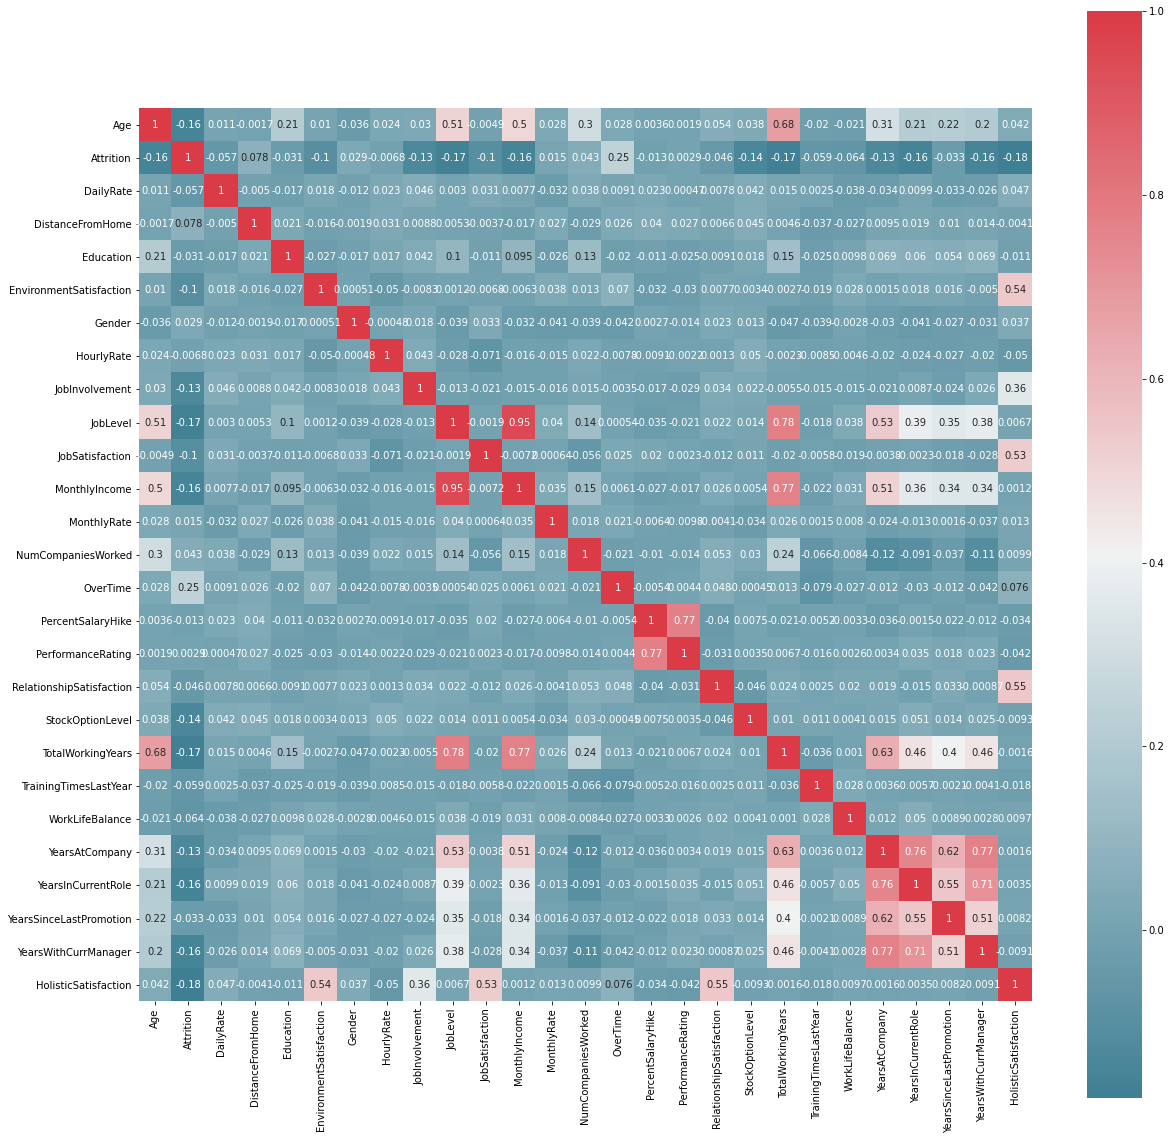

In [ ]:
# Plotting the Correlation Matrix Again with updated set of features
f, ax = plt.subplots(figsize=(20,20))
corr = dataset.corr()
sns.heatmap(corr,mask=np.zeros_like(corr,dtype=np.bool),cmap = sns.diverging_palette(220,10,as_cmap=True),square = True,ax=ax,annot=True)

<h2>Exploratory Data Analysis and Visualization</h2>

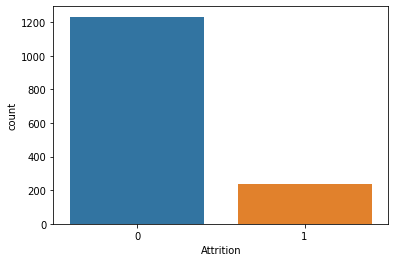

In [ ]:
# Plotting the distribution of the attrition
sns.countplot(x ='Attrition',data = dataset)

As seen from above plot, there is a severe class imbalance in the attrition class and the value of 'No' or 0 far outweigh the 'Yes' or 1.

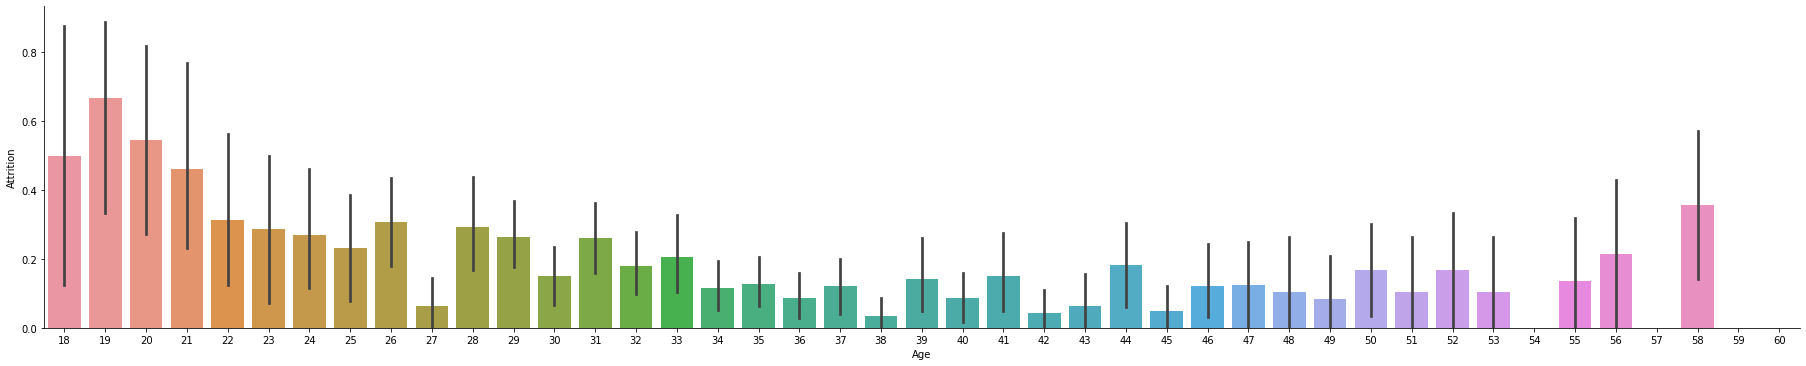

In [ ]:
# Plotting Age and Attrition
sns.factorplot(x = 'Age', y = 'Attrition', aspect = 5,kind = 'bar',data = dataset)

Younger people tend have to higher attrition rates.


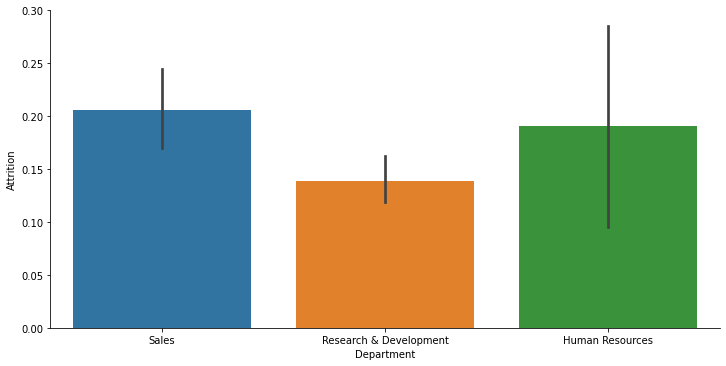

In [ ]:
# Plotting Deparment and Attrition
sns.factorplot(x = 'Department' , y = 'Attrition', aspect = 2, kind = 'bar', data = dataset)

The Sales Department has the highest attrition with human resources being slightly less than it.


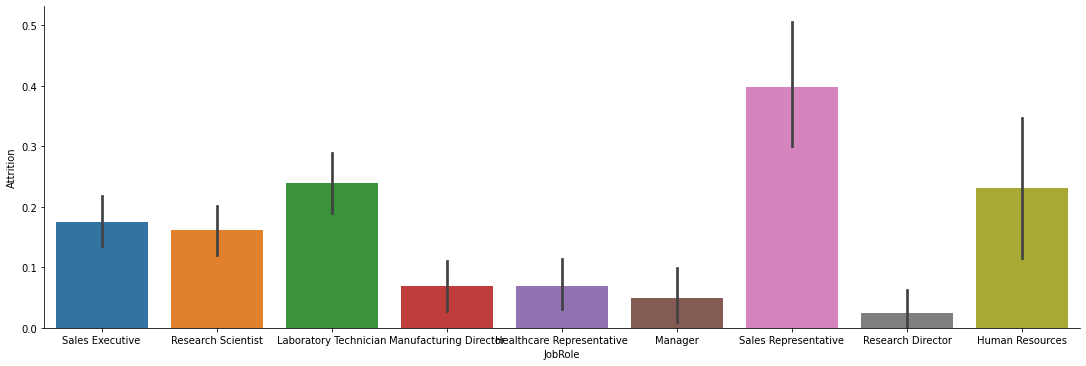

In [ ]:
# Plotting Job Role and Attrition
sns.factorplot(x = 'JobRole', y = 'Attrition', aspect = 3 , kind = 'bar', data  = dataset)

The job role with the least attrition is of a ResearchDirector and the one with maximum attrition is of a Sales Representative.


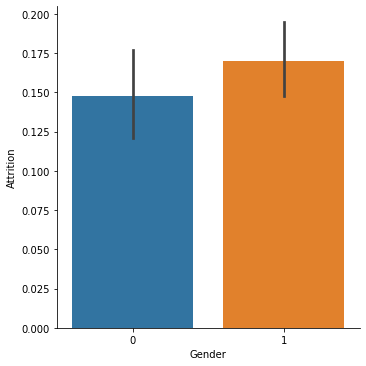

In [ ]:
# Plotting Gender and Attrition
sns.factorplot(x = 'Gender', y = 'Attrition', aspect = 1, kind = 'bar', data = dataset)

The Male employees tend to have a higher attrition rate as compared to females.

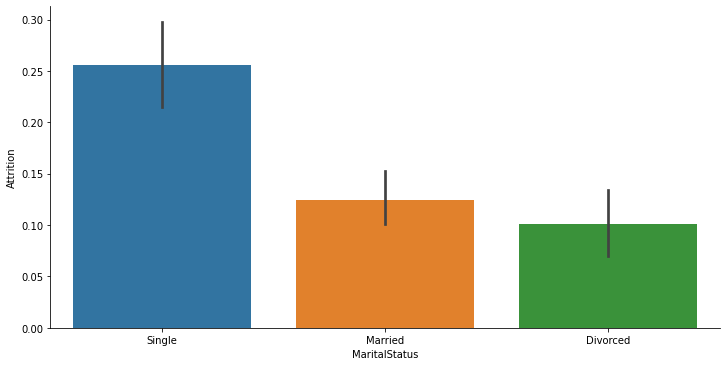

In [ ]:
# Plotting MaritalStatus and Attrition
sns.factorplot(x = 'MaritalStatus', y = 'Attrition', aspect = 2 , kind = 'bar', data = dataset)

Single employees tend to have higher attrition.

[Text(0, 0.5, 'Percent')]

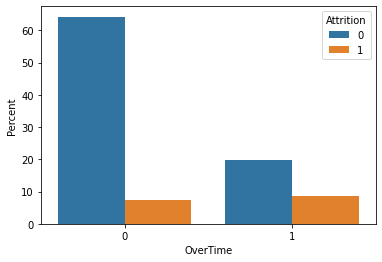

In [ ]:
# Plotting OverTime and Attrition
ax = sns.barplot(x="OverTime", y="MonthlyIncome", hue="Attrition", data=dataset, estimator=lambda x: len(x) / len(dataset) * 100)
ax.set(ylabel="Percent")

People who overtime have a higher chances of leaving the organization.


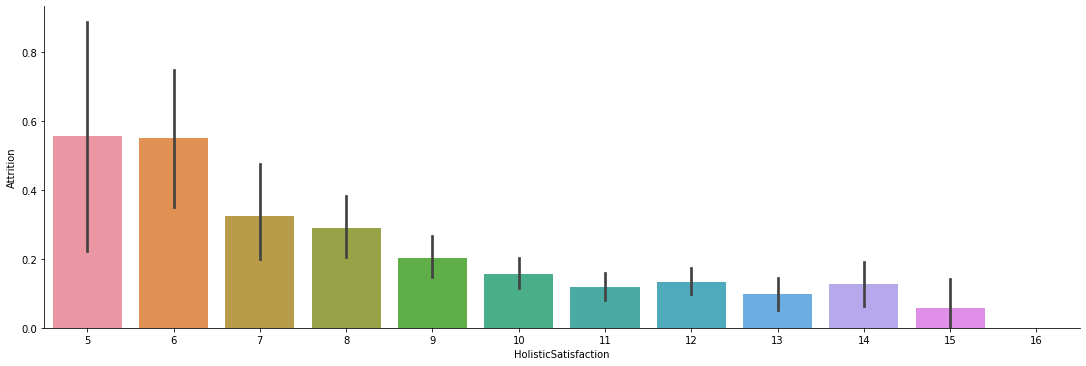

In [ ]:
# Plotting HolisticSatisfaction and Attrition
sns.factorplot(x = 'HolisticSatisfaction',y = 'Attrition', aspect = 3, kind = 'bar', data = dataset)

Employees with less Holistic Satisfaction tend to leave the organization.

Text(0.5, 1.0, 'Employee Monthly Income Distribution - Attrition V.S. No Attrition')

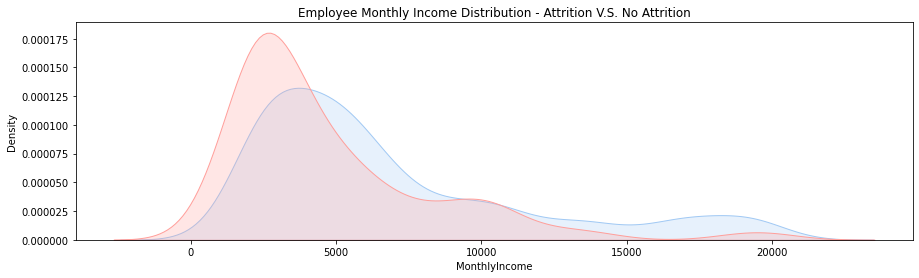

In [ ]:
# Plotting Monthly Income and Attrition
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(dataset.loc[(dataset['Attrition'] == 0),'MonthlyIncome'] , color='b',shade=True, label='No Attrition')
ax=sns.kdeplot(dataset.loc[(dataset['Attrition'] == 1),'MonthlyIncome'] , color='r',shade=True, label='Attrition')
plt.title('Employee Monthly Income Distribution - Attrition V.S. No Attrition')

People with lower monthly income have a higher attrition rate.


<h2>Preprocessing</h2>

In [ ]:
# Dummy Variables are generated for categorical features
dataset = pd.get_dummies(data = dataset, columns=['BusinessTravel','Department','JobRole','MaritalStatus','EducationField'])
dataset.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,HolisticSatisfaction,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree
0,41,1,1102,1,2,2,0,94,3,2,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,10,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
1,49,0,279,8,1,3,1,61,2,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,11,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
2,37,1,1373,2,2,4,1,92,2,1,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,11,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,33,0,1392,3,4,4,0,56,3,1,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,13,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0
4,27,0,591,2,1,1,1,40,3,1,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,10,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0


<h3>Removing Outliers using Z-Score</h3>

In [ ]:
# Z score is also called standard score.
# This score helps to understand if a data value is greater or smaller than mean and how far away it is from the mean.
# Z score tells how many standard deviations away a data point is from the mean.

cols = list(dataset.columns)
remove = []
dt = np.array(dataset)
thresh = 2.5

# Calculating ZScore and removing outliers from YearsAtCompany, TotalWorkingHours, and MonthlyIncome
for i in [13, 23, 26]:
    data = dt.T[i]
    m = np.mean(data)
    s = np.std(data)
    for i in range(len(data)):
        z = abs((data[i] - m) / s)
        if(z > thresh):
            remove.append(i)

# list of outliers
remove = list(set(remove))
remove.sort()

print("Initial Length of dataset ==> ",len(dt))

# Removing outliers from the dataset
for i in range(len(remove) - 1, -1, -1):
    dt = np.delete(dt, remove[i], 0)
print("Final Lenghth of dataset ==> ",len(dt))
print("No. of Outliers removed ==> ",len(remove))

dt = pd.DataFrame(dt)
dt.columns = cols
dataset = dt

Initial Length of dataset ==>  1470
Final Lenghth of dataset ==>  1375
No. of Outliers removed ==>  95


In [ ]:
# Separating the dataset into features and target variables
df_x = dataset.drop(['Attrition'], axis=1)
df_y = dataset['Attrition']
df_x.shape

(1375, 50)

In [ ]:
# Scaling the features to treat the outliers
mms = MinMaxScaler() # InBuilt Sklearn Scaler Library
dt_x = df_x

# Fitting and Transforming the data
dt_x[["Age", "DailyRate", "DistanceFromHome", "HourlyRate", "MonthlyRate", "MonthlyIncome", "NumCompaniesWorked", "PercentSalaryHike", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", "YearsWithCurrManager", "YearsInCurrentRole", "YearsSinceLastPromotion"]] = mms.fit_transform(dt[["Age", "DailyRate", "DistanceFromHome", "HourlyRate", "MonthlyRate", "MonthlyIncome", "NumCompaniesWorked", "PercentSalaryHike", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", "YearsWithCurrManager", "YearsInCurrentRole", "YearsSinceLastPromotion"]])
df_x = dt_x

<h2>Principal Component Analysis</h2>

Text(0.5, 1.0, 'PCA')

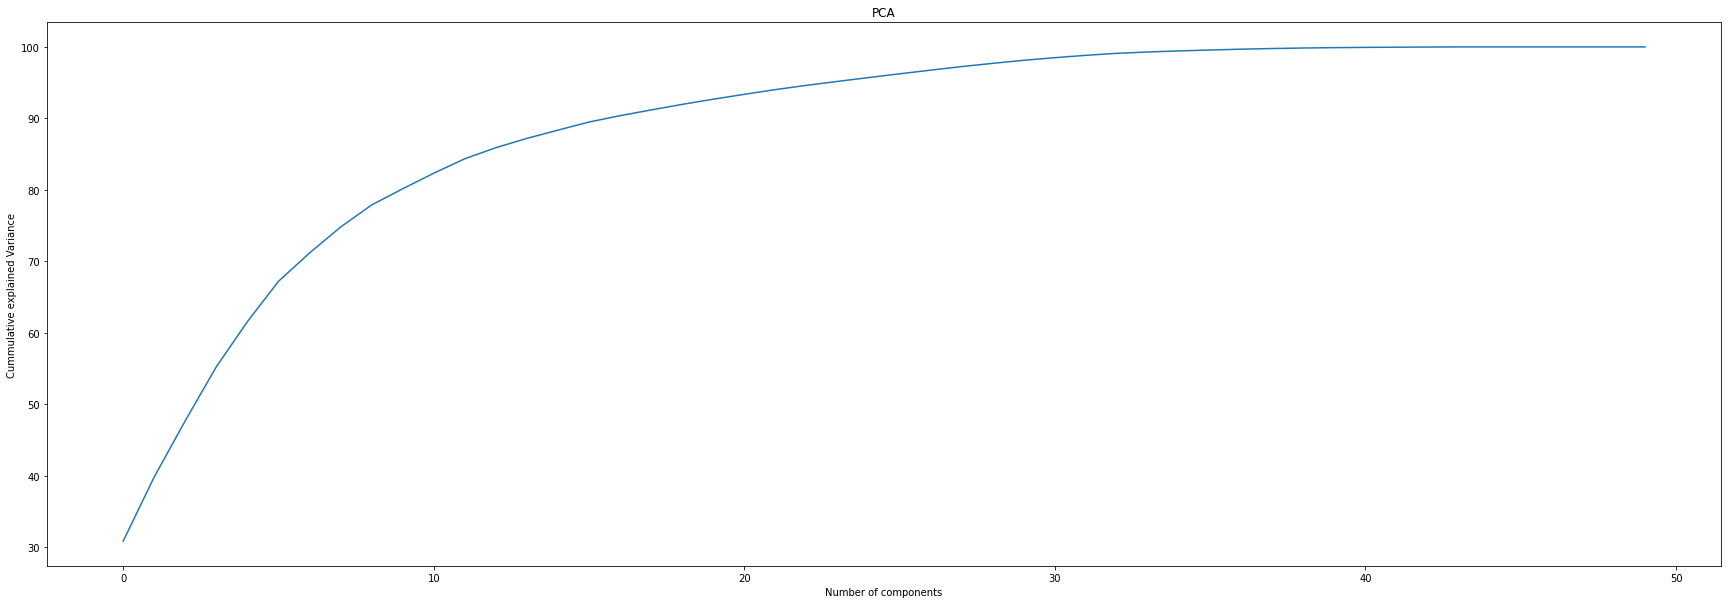

In [ ]:
# Initializing Sklearn's PCA object
pca = PCA().fit(df_x)

# Plotting the Cummulative Variance and the number of components
plt.figure(figsize=(30,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_)*100)
plt.xlabel('Number of components')
plt.ylabel('Cummulative explained Variance')
plt.title('PCA')

As seen from the plot, around 30 PCA features encompass the entire variance that is present in the data

<h3>Visualizing PCA with 3 components for the dataset</h3>

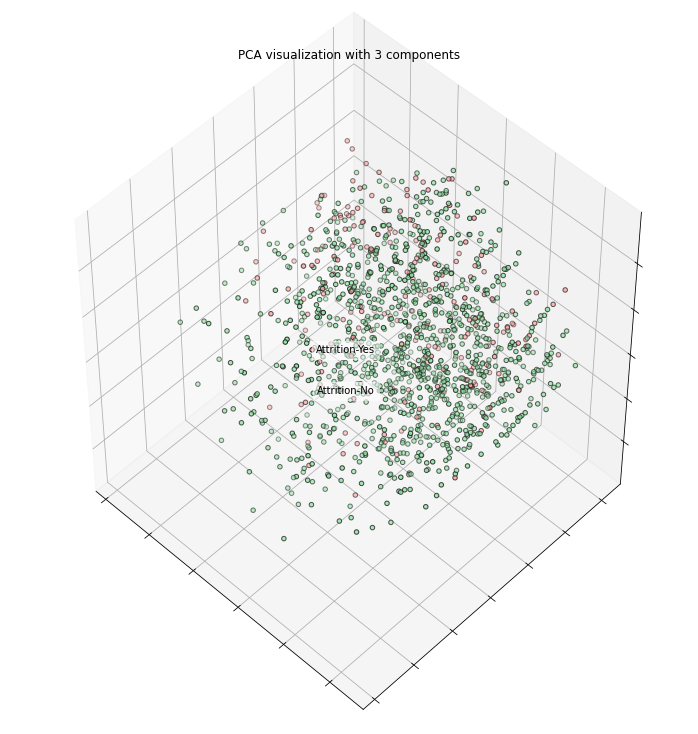

In [ ]:
# Initialization of PCA and transforming the data
pca = PCA(n_components=3)
pca.fit(df_x)
df_x_pca = pca.transform(df_x)

# Initializing the 3D plot
fig = plt.figure(1,figsize=(10,10))
plt.clf()
ax = Axes3D(fig, rect = [0,0,.95,1],elev = 48,azim = 134)
plt.cla()

df_y_temp = df_y.apply(lambda x: 'r' if x == 1 else 'g')

# Plotting the 3 PCA components
for name, label in [('Attrition-Yes',1), ('Attrition-No',0)]:
    ax.text3D(df_x_pca[df_y == label, 0].mean(),
    df_x_pca[df_y == label,1].mean()+1.5,
    df_x_pca[df_y == label ,2].mean(),
    name,horizontalalignment='center',
    bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
ax.scatter(df_x_pca[:,0],df_x_pca[:,1],df_x_pca[:,2], c = df_y_temp,cmap=plt.cm.nipy_spectral,edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
plt.title("PCA visualization with 3 components")
plt.show()

<h1>Classification for Prediction</h1>

In [ ]:
def baseline_classifier(model,params, x, y):
    """
    The method converts the input dataframes into numpy arrays of appropriate shapes.
    Then the classifier object is instatiated by input params and model class
    The method then generates scores of parameters(accuracy, precision, recall, f1) using kfold cross validation

    Args: 
      model(): The model class
      params(dict): A dictionary of parameters for the model
      x(Dataframe): Features of the data
      y(Dataframe): Output labels of the data

    Prints the values of the metric in a tabular form
    """
    # Initializing the model
    model = model(**params)

    # Initializing the kfold
    kfold = KFold(n_splits = 10)
    
    # Converting dataframes into numpy arrays
    x = df_x.iloc[:,:].values
    y = df_y.iloc[:].values
    y = np.array([y]).T
    # print("X.shape = "+str(x.shape)+" || Y.shape = "+str(y.shape))
    # print()

    # Generating cross validated scores
    scores = cross_validate(model,x,y,cv = kfold,scoring = ['accuracy','f1','precision','recall'])

    accuracy = round(np.average(scores['test_accuracy'])*100,2)
    precision = round(np.average(scores['test_precision'])*100,2)
    recall = round(np.average(scores['test_recall'])*100,2)
    f1_Score = round(np.average(scores['test_f1'])*100,2)

    # Printing the tabular data
    data = [[accuracy,precision,recall,f1_Score]]
    print (tabulate(data, headers=["Accuracy", "Precision", "Recall", "F1 Score"]))
    # print()
    # print(model)
    # print()

In [ ]:
def modulated_freq_classifier(model, params, x, y, freq_flag):
    """
    The method converts the input dataframes into numpy arrays of appropriate shapes.
    Then the classifier object is instatiated by input params and model class
    The method then generates scores of parameters(accuracy, precision, recall, f1) using kfold cross validation

    Args: 
      model(): The model class
      params(dict): A dictionary of parameters for the model
      x(Dataframe): Features of the data
      y(Dataframe): Output labels of the data
      freq_flag(string): if 'upsample' then the input data is upsampled using SMOTE
                        if 'downsample' then the input data is downsampled

    Prints the values of the metric in a tabular form
    """

    # Initializing the model
    model = model(**params)

    # Initializing the kfold
    kfold = KFold(n_splits = 10)

    # Converting dataframes into numpy arrays
    x = df_x.iloc[:,:].values
    y = df_y.iloc[:].values
    y = np.array([y]).T
    # print("X.shape = "+str(x.shape)+" || Y.shape = "+str(y.shape))
    # print()

    # initializing metric variables
    accuracy = 0
    precision = 0
    recall = 0
    f1_Score = 0

    # Looping through the folds
    for train_idx, test_idx in kfold.split(x):

        # Generating test and training set
        x_train, x_test = x[train_idx], x[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        if freq_flag == "upsample":
            # Initializing SMOTE with a fixed random state for reproducible results
            sm = SMOTE(random_state = 12)

            # Transforming the training data
            x_train_sm, y_train_sm = sm.fit_sample(x_train, np.ravel(y_train, order = 'C'))
            
            # Fitting the transformed data in the model
            model.fit(x_train_sm, y_train_sm)

            # Predicting the model on the test set
            y_test_pred = model.predict(x_test)

            # Storing the metrics
            accuracy = accuracy + accuracy_score(y_test, y_test_pred)
            precision = precision + precision_score(y_test, y_test_pred)
            recall = recall + recall_score(y_test, y_test_pred)
            f1_Score = f1_Score + f1_score(y_test, y_test_pred)


        elif freq_flag == "downsample":
            # Combining both the dataframes
            combo = np.concatenate((x_train,y_train),axis = 1)
            df = pd.DataFrame(data=combo)

            # Separating the dataframe on based of the output labels
            df_majority = df[df.iloc[:,-1] == 0]
            df_minority = df[df.iloc[:,-1] == 1]

            # Downsampling the majority class down to minority class
            df_majority_downsampled = resample(df_majority,replace = False,n_samples = len(df_minority), random_state = 123)

            # Recombining the modified classes
            df_downsampled = pd.concat([df_majority_downsampled,df_minority])
            x_train = df_downsampled.iloc[:,:-1].values
            y_train = df_downsampled.iloc[:,-1].values
            y_train = np.array([y_train]).T

            # Fitting the model on the data
            model.fit(x_train, y_train)

            # Generating the predicted values
            y_test_pred = model.predict(x_test)
            
            # Storing the metrics
            accuracy = accuracy + accuracy_score(y_test, y_test_pred)
            precision = precision + precision_score(y_test, y_test_pred)
            recall = recall + recall_score(y_test, y_test_pred)
            f1_Score = f1_Score + f1_score(y_test, y_test_pred)

    # Rounding off the metrics    
    accuracy = round(accuracy*10,2)
    precision = round(precision*10,2)
    recall = round(recall*10,2)
    f1_Score = round(f1_Score*10,2)

    # Printing the data
    data = [[accuracy,precision,recall,f1_Score]]
    print (tabulate(data, headers=["Accuracy", "Precision", "Recall", "F1 Score"]))
    # print()
    # print(model)
    # print()

In [ ]:
def returnData(model,params, x, y):
    """
    Returns the evaluation metrics for a particular dataset and params
        The method converts the input dataframes into numpy arrays of appropriate shapes.
    Then the classifier object is instatiated by input params and model class
    The method then generates scores of parameters(accuracy, precision, recall, f1) using kfold cross validation

    Args: 
      model(): The model class
      params(dict): A dictionary of parameters for the model
      x(Dataframe): Features of the data
      y(Dataframe): Output labels of the data

    returns:
      arr : evaluation metrics including accuracy precision and recall.
    """
    model = model(**params)
    kfold = KFold(n_splits = 10)
    
    x = df_x.iloc[:,:].values
    y = df_y.iloc[:].values
    y = np.array([y]).T
    # print("X.shape = "+str(x.shape)+" || Y.shape = "+str(y.shape))
    # print()

    scores = cross_validate(model,x,y,cv = kfold,scoring = ['accuracy','f1','precision','recall'])

    accuracy = round(np.average(scores['test_accuracy'])*100,2)
    precision = round(np.average(scores['test_precision'])*100,2)
    recall = round(np.average(scores['test_recall'])*100,2)
    f1_Score = round(np.average(scores['test_f1'])*100,2)

    data = [accuracy,precision,recall,f1_Score]
    return data

In [ ]:
def makeGraphMD(model, df_x, df_y):
    """
    Plots the graph for tree algorithms of depth vs values of metrics
    Args: 
      model(): The model class
      df_x(Dataframe): Features of the data
      df_y(Dataframe): Output labels of the data
    """
    precision = []
    recall = []
    f1 = []
    vals = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
    for i in vals:
        # print(i)
        data = returnData(model,{'random_state':27, 'max_depth':i},df_x,df_y)
        # print(data)
        precision.append(data[1])
        recall.append(data[2])
        f1.append(data[3])

    plt.figure()
    plt.plot(vals, precision, label = "Precision")
    plt.plot(vals, recall, label = "Recall")
    plt.plot(vals, f1, label = "F1-score")
    plt.xlabel("Depth")
    plt.ylabel("Values")
    plt.legend()
    plt.show()

<h2>Logistic Regression</h2>

<h3>Baseline Logistic Regression</h3>

In [ ]:
baseline_classifier(LogisticRegression,{},df_x,df_y)

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     89.38        80.91     44.41       56.05


<h3>Upsampling SMOTE</h3>

In [ ]:
modulated_freq_classifier(LogisticRegression,{},df_x,df_y,"upsample")

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     77.74        39.22     73.26       50.74


<h3>Down Sampling</h3>

In [ ]:
modulated_freq_classifier(LogisticRegression,{},df_x,df_y,"downsample")

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     74.54        35.64     74.97        48.1


<h2>Gaussian Naive Bayes</h2>

<h3> Baseline Naive Bayes </h3>

In [ ]:
baseline_classifier(GaussianNB,{},df_x,df_y)

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     41.52        19.86     89.22       32.39


<h3>Upsampling SMOTE</h3>

In [ ]:
modulated_freq_classifier(GaussianNB,{},df_x,df_y,"upsample")

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     46.25         20.7     85.14       33.21


<h3>Down Sampling</h3>

In [ ]:
modulated_freq_classifier(GaussianNB,{},df_x,df_y,"downsample")

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     37.75        19.04     90.56       31.36


<h2>Decision Tree</h2>

Finding optimal depth

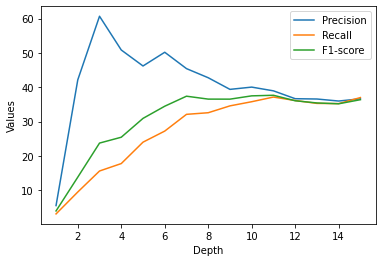

In [ ]:
makeGraphMD(DecisionTreeClassifier, df_x, df_y)

Optimal Depth: 8

<h3>Baseline Decision Tree</h3>

In [ ]:
baseline_classifier(DecisionTreeClassifier,{'max_depth':8},df_x,df_y)

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     82.03        41.96     33.95       37.24


<h3>Upsampled SMOTE </h3>

In [ ]:
modulated_freq_classifier(DecisionTreeClassifier,{},df_x,df_y,"upsample")

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     77.75        32.77     35.99        33.6


<h3>Down Sampling</h3>

In [ ]:
modulated_freq_classifier(DecisionTreeClassifier,{},df_x,df_y,"downsample")

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     62.62        24.68     65.98        35.8


<h2>Random Forest</h2>

Finding optimal depth

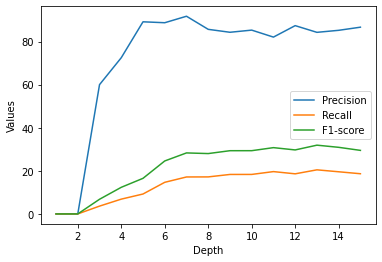

In [ ]:
makeGraphMD(RandomForestClassifier, df_x, df_y)

Optimal Depth: 7

<h3>Baseline</h3>

In [ ]:
baseline_classifier(RandomForestClassifier,{'random_state':27, 'max_depth':7},df_x,df_y)

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     86.62        91.75     17.15       28.31


<h3>Upsampled SMOTE</h3>

In [ ]:
modulated_freq_classifier(RandomForestClassifier,{'random_state':27},df_x,df_y,"upsample")

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     86.62        69.98     30.81       41.38


<h3>Down Sampling</h3>

In [ ]:
modulated_freq_classifier(RandomForestClassifier,{'random_state':27},df_x,df_y,"downsample")

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     74.11        34.79     73.07       47.04


<h2>Perceptron</h2>

<h3>Baseline</h3>

In [ ]:
baseline_classifier(Perceptron,{},df_x,df_y)

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     79.67        59.03     53.87       47.29


<h3>Upsampled SMOTE</h3>

In [ ]:
modulated_freq_classifier(Perceptron,{},df_x,df_y,"upsample")

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
      75.4         43.9     68.23       47.85


In [ ]:
modulated_freq_classifier(Perceptron,{},df_x,df_y,"downsample")

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     60.14        36.47     74.21       38.93


<h2>Multi Layer Perceptron</h2>

Plot for number of Hidden Layers

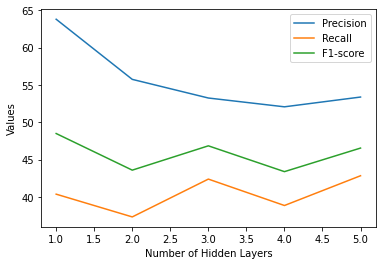

In [ ]:
arr = [100]
precision = []
recall = []
f1 = []
for i in range(5):
    # print(i)
    data = returnData(MLPClassifier, {'random_state':27, 'hidden_layer_sizes':arr, 'alpha':0}, df_x, df_y)
    precision.append(data[1])
    recall.append(data[2])
    f1.append(data[3])
    arr.append(100)

plt.figure()
plt.plot([1, 2, 3, 4, 5], precision, label = "Precision")
plt.plot([1, 2, 3, 4, 5], recall, label = "Recall")
plt.plot([1, 2, 3, 4, 5], f1, label = "F1-score")
plt.xlabel("Number of Hidden Layers")
plt.ylabel("Values")
plt.legend()
plt.show()

Optimal Hidden Layers: 1

Plot for number of Hidden Units


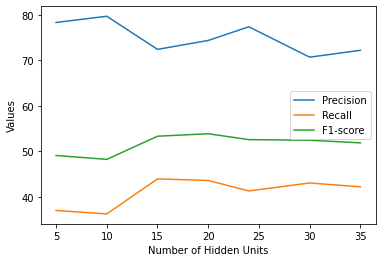

In [ ]:
precision = []
recall = []
f1 = []
vals = [5, 10, 15, 20, 24, 30, 35]
for i in vals:
    # print(i)
    data = returnData(MLPClassifier, {'random_state':27, 'hidden_layer_sizes':[i], 'alpha':0}, df_x, df_y)
    precision.append(data[1])
    recall.append(data[2])
    f1.append(data[3])

plt.figure()
plt.plot(vals, precision, label = "Precision")
plt.plot(vals, recall, label = "Recall")
plt.plot(vals, f1, label = "F1-score")
plt.xlabel("Number of Hidden Units")
plt.ylabel("Values")
plt.legend()
plt.show()

Optimal Hidden Units: 24

Finding the best activation function

In [ ]:
for i in ['relu', 'identity', 'logistic', 'tanh']:
    baseline_classifier(MLPClassifier, {'random_state':27, 'hidden_layer_sizes':[24], 'activation':i}, df_x, df_y)

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     88.58        74.38     42.83       53.24
  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
      88.8        75.77     44.16       54.42
  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     88.87        78.11     42.23       53.46
  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     88.65         73.1      44.9       54.36


<h3>Upsample SMOTE</h3>

In [ ]:
modulated_freq_classifier(MLPClassifier, {'random_state':27, 'hidden_layer_sizes':[24], 'activation':'logistic'}, df_x, df_y, 'upsample')

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     79.63        41.61     69.23       51.53


<h3>Down Sampling</h3>

In [ ]:
modulated_freq_classifier(MLPClassifier, {'random_state':27, 'hidden_layer_sizes':[24], 'activation':'logistic'}, df_x, df_y, 'downsample')

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     74.39        35.01     72.47       46.98


<h2>Support Vector Machines<h2>

Finding the best kernel

In [ ]:
for i in ['linear', 'poly', 'rbf', 'sigmoid']:
    baseline_classifier(SVC, {'kernel':i, 'probability':True}, df_x, df_y)

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     89.31        82.27     41.96       54.67
  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     84.22            0         0           0
  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     84.22            0         0           0
  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     83.71           11      1.06        1.67


<h3>Baseline</h3>

In [ ]:
baseline_classifier(SVC,{'kernel':'linear','probability':True},df_x,df_y)

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     89.31        82.27     41.96       54.67


<h3>Upsampling SMOTE</h3>

In [ ]:
modulated_freq_classifier(SVC,{'kernel':'linear'},df_x,df_y,"upsample")

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     77.53        38.69     72.34        50.1


<h3>Downsampling</h3>

In [ ]:
modulated_freq_classifier(SVC,{'kernel':'linear'},df_x,df_y,"downsample")

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     76.21        37.44     75.04       49.73


<h2>Gradient Boosting Classifier</h2>

Finding the optimal depth

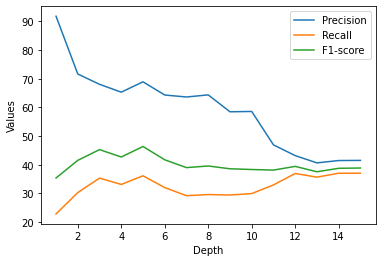

In [ ]:
makeGraphMD(GradientBoostingClassifier, df_x, df_y)

Optimal Depth: 5

<h3>Baseline</h3>

In [ ]:
baseline_classifier(GradientBoostingClassifier, {'max_depth':5}, df_x, df_y)

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     86.26        65.86     32.86       41.95


<h3>Downsampling</h3>


In [ ]:
modulated_freq_classifier(GradientBoostingClassifier, {}, df_x, df_y, "downsample")

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     73.09         33.6     71.47       45.53


<h3>Upsampling</h3>

In [ ]:
modulated_freq_classifier(GradientBoostingClassifier, {}, df_x, df_y, "upsample")

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     86.76        63.91     39.52        47.9


<h2>XGBoost Classifier</h2>

Finding the optimal depth


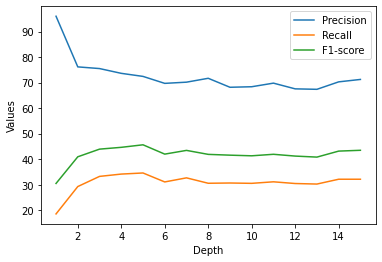

In [ ]:
makeGraphMD(XGBClassifier, df_x, df_y)

Optimal Depth: 5

<h>Baseline</h3>

In [ ]:
baseline_classifier(XGBClassifier, {'max_depth':5}, df_x, df_y)

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     87.42        72.43     34.59       45.63


<h>Downsampling</h3>

In [ ]:
modulated_freq_classifier(XGBClassifier, {}, df_x, df_y, "downsample")

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     73.46        33.54     68.56       44.87


<h>Upsampling</h3>

In [ ]:
modulated_freq_classifier(XGBClassifier, {}, df_x, df_y, "upsample")

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     87.27        67.28      38.4       48.07


<h2>Curves</h2>

In [ ]:
x = df_x.iloc[:,:].values
y = df_y.iloc[:].values
y = np.array([y]).T
# print("X.shape = "+str(x.shape)+" || Y.shape = "+str(y.shape))

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state = 123, stratify =y)

lr = LogisticRegression()
lr.fit(x_train,y_train)

gnb = GaussianNB()
gnb.fit(x_train,y_train)

dt = DecisionTreeClassifier(max_depth = 8)
dt.fit(x_train,y_train)

rf = RandomForestClassifier(max_depth = 7)
rf.fit(x_train, y_train)

mlp = MLPClassifier(hidden_layer_sizes=[24], activation = 'logistic')
mlp.fit(x_train,y_train)

svm = SVC(kernel = 'linear',probability = True)
svm.fit(x_train,y_train)

gbc = GradientBoostingClassifier(max_depth = 5)
gbc.fit(x_train, y_train)

xgb = XGBClassifier(max_depth = 5)
xgb.fit(x_train, y_train)

<h3>ROC Curves</h3>

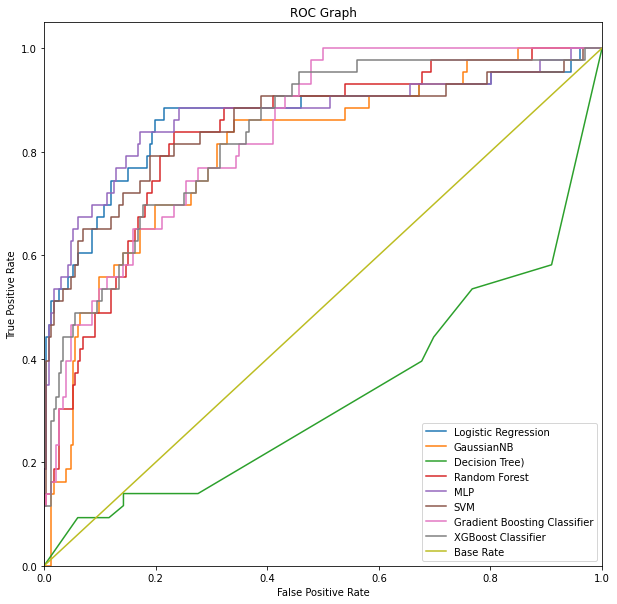

In [ ]:
lr_fpr, lr_tpr, thresholds = roc_curve(y_test, lr.predict_proba(x_test)[:,1])
gnb_fpr, gnb_tpr, thresholds = roc_curve(y_test, gnb.predict_proba(x_test)[:,1])
dt_fpr, dt_tpr, thresholds = roc_curve(y_test, dt.predict_proba(x_test)[:,1])
rf_fpr, rf_tpr, thresholds = roc_curve(y_test, rf.predict_proba(x_test)[:,1])
mlp_fpr, mlp_tpr, thresholds = roc_curve(y_test, mlp.predict_proba(x_test)[:,1])
svm_fpr, svm_tpr, thresholds = roc_curve(y_test, svm.predict_proba(x_test)[:,1])
gbc_fpr, gbc_tpr, thresholds = roc_curve(y_test, gbc.predict_proba(x_test)[:,1])
xgb_fpr, xgb_tpr, thresholds = roc_curve(y_test, xgb.predict_proba(x_test)[:,1])

plt.figure(figsize = (10,10))
plt.plot(lr_fpr, lr_tpr, label = 'Logistic Regression' )
plt.plot(gnb_fpr, gnb_tpr, label = 'GaussianNB')
plt.plot(dt_fpr, dt_tpr,label = 'Decision Tree)')
plt.plot(rf_fpr, rf_tpr, label = 'Random Forest' )
plt.plot(mlp_fpr,mlp_tpr, label = 'MLP' )
plt.plot(svm_fpr, svm_tpr, label = 'SVM')
plt.plot(gbc_fpr, gbc_tpr, label = 'Gradient Boosting Classifier')
plt.plot(xgb_fpr, xgb_tpr, label = 'XGBoost Classifier')

plt.plot([0,1], [0,1],label='Base Rate')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

<h3>PR Curves</h3>

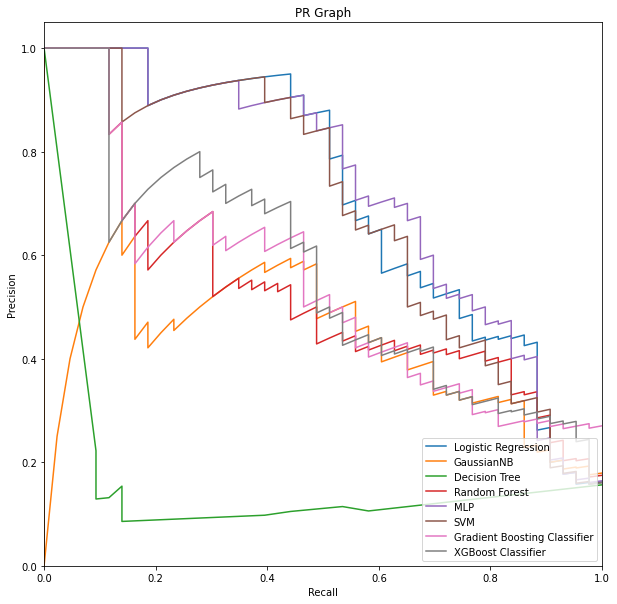

In [ ]:
lr_pre, lr_re, thresholds = precision_recall_curve(y_test, lr.predict_proba(x_test)[:,1])
gnb_pre, gnb_re, thresholds = precision_recall_curve(y_test,gnb.predict_proba(x_test)[:,1])
dt_pre, dt_re, thresholds = precision_recall_curve(y_test,dt.predict_proba(x_test)[:,1])
rf_pre, rf_re, thresholds = precision_recall_curve(y_test,
rf.predict_proba(x_test)[:,1])
mlp_pre, mlp_re, thresholds = precision_recall_curve(y_test,mlp.predict_proba(x_test)[:,1])
svm_pre, svm_re, thresholds = precision_recall_curve(y_test, svm.predict_proba(x_test)[:,1])
gbc_pre, gbc_re, thresholds = precision_recall_curve(y_test, gbc.predict_proba(x_test)[:,1])
xgb_pre, xgb_re, thresholds = precision_recall_curve(y_test, xgb.predict_proba(x_test)[:,1])

plt.figure(figsize = (10,10))
plt.plot(lr_re,lr_pre,label ='Logistic Regression')
plt.plot(gnb_re,gnb_pre,label ='GaussianNB')
plt.plot(dt_re, dt_pre, label = 'Decision Tree')
plt.plot(rf_re, rf_pre, label = 'Random Forest')
plt.plot(mlp_re, mlp_pre, label = 'MLP')
plt.plot(svm_re, svm_pre, label = 'SVM')
plt.plot(gbc_re, gbc_pre, label = 'Gradient Boosting Classifier')
plt.plot(xgb_re, xgb_pre, label = 'XGBoost Classifier')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR Graph')
plt.legend(loc="lower right")
plt.show()

<h2>Feature Importance</h2>

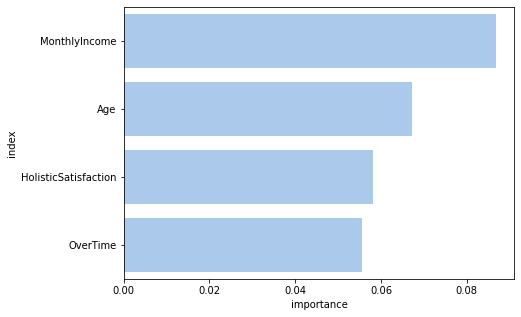

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df_x,df_y,test_size=0.2,random_state = 123)
feature_importances = pd.DataFrame(rf.feature_importances_,index = x_train.columns,columns=['importance']).sort_values('importance', ascending=False)
feature_importances = feature_importances.reset_index()[:4]
f, ax = plt.subplots(figsize=(7,5))

sns.set_color_codes("pastel")
sns.barplot(x="importance", y='index', data=feature_importances,label="Total", color="b")

<h2>Unsupervised Learning</h2>

<h2>KMeans</h2>

<h3>Elbow Criterion</h3>

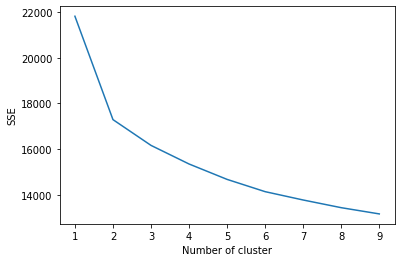

In [ ]:
sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k, max_iter=1000, init = 'k-means++').fit(df_x, df_y)
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()),list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

<h3>Baseline</h3>

In [ ]:
n_clusters = 2
baseline_classifier(KMeans,{'n_clusters':n_clusters},df_x, df_y)

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     51.47        16.99     48.38       24.88


<h3>Upsampled SMOTE</h3>

In [ ]:
modulated_freq_classifier(KMeans,{'n_clusters':n_clusters},df_x, df_y, "upsample")

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
      53.3        18.45     52.72       27.09


<h3>Downsampled</h3>

In [ ]:
modulated_freq_classifier(KMeans,{'n_clusters':n_clusters},df_x, df_y, "downsample")

  Accuracy    Precision    Recall    F1 Score
----------  -----------  --------  ----------
     50.48        17.27     52.05       25.67
